# Plotting and Visualization

Making informative visualizations (sometimes called plots) is one of the most impor‐ tant tasks in data analysis. It may be a part of the exploratory process—for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models. For others, building an interactive visualization for the web may be the end goal. Python has many add-on libraries for making static or dynamic visuali‐ zations, but I’ll be mainly focused on matplotlib and libraries that build on top of it. 

matplotlib is a desktop plotting package designed for creating (mostly twodimensional) publication-quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPy‐ thon communities have collaborated to simplify interactive plotting from the IPython shell (and now, Jupyter notebook). matplotlib supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). With the exception of a few diagrams, nearly all of the graphics in this book were produced using matplotlib. 

Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is seaborn, which we explore later in this chapter. 

The simplest way to follow the code examples in the chapter is to use interactive plot‐ ting in the Jupyter notebook. To set this up, execute the following statement in a Jupyter notebook:

    %matplotlib notebook

In [82]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## A Brief matplotlib API Primer

After running %matplotlib notebook in Jupyter (or simply %matplotlib in IPy‐ thon), we can try creating a simple plot. If everything is set up right, a line plot like Figure 9-1 should appear:

(Page 254). 

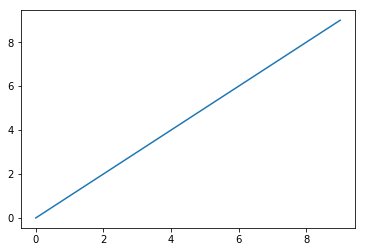

In [3]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

(Page 255). 

In [4]:
fig = plt.figure()

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands. plt.figure has a number of options; notably, figsize will guarantee the figure has a certain size and aspect ratio if saved to disk. 

You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:

(Page 255). 

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.



Here we run all of these commands in the same cell:

(Page 256). 

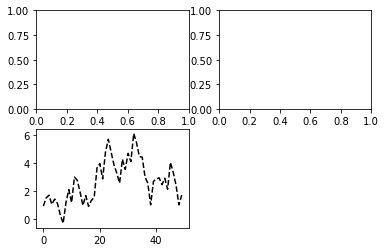

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), mat‐ plotlib draws on the last figure and subplot used (creating one if necessary), thus hid‐ ing the figure and subplot creation. So if we add the following command, you’ll get something like Figure 9-3:

(Page 256). 

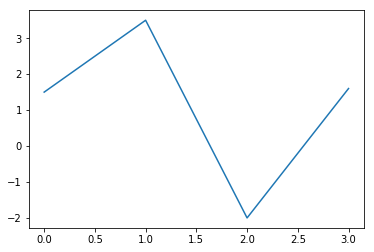

In [8]:
plt.plot([1.5, 3.5, -2, 1.6])

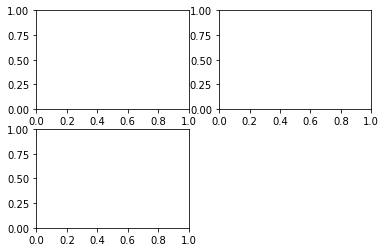

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

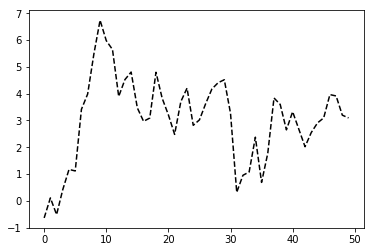

In [17]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

> The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one’s instance method (see Figure 9-4):



<IPython.core.display.Javascript object>


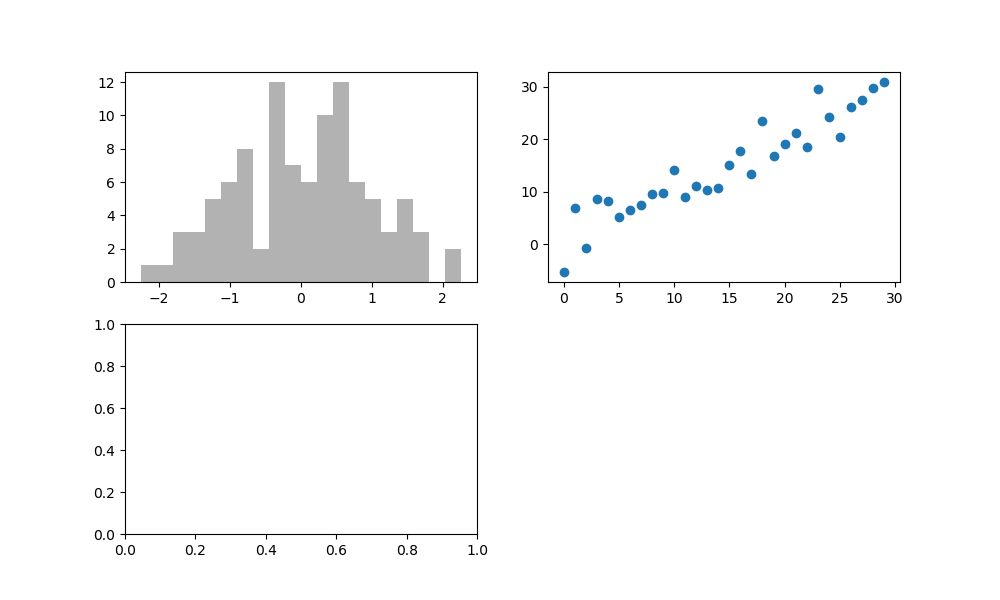

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [60]:
plt.close('all')

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects:

(Page 257). 

<IPython.core.display.Javascript object>


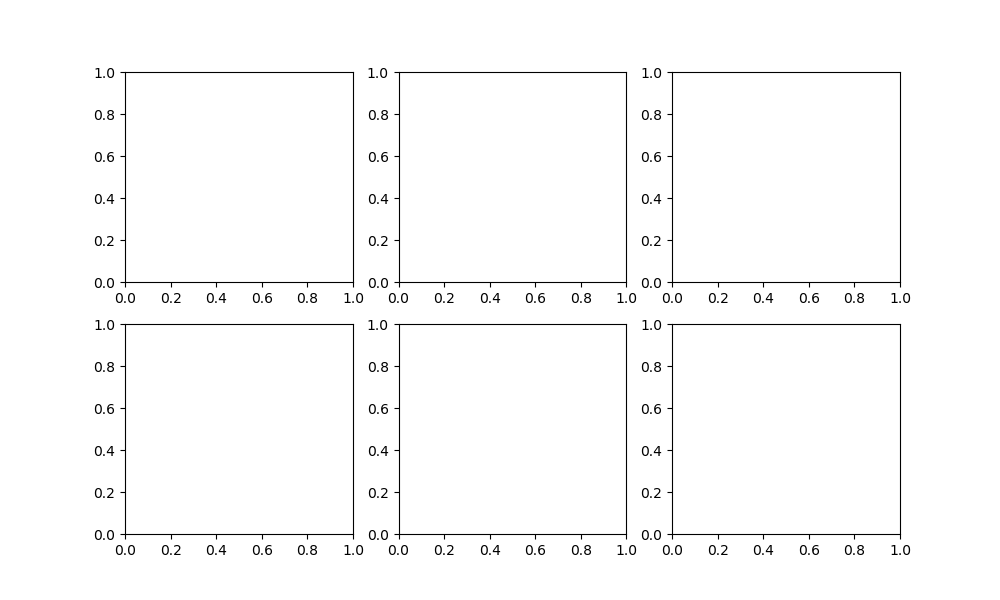

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C602059E8>,
      dtype=object)

In [61]:
fig, axes = plt.subplots(2, 3)
axes

In [63]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C602059E8>,
      dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1]. You can also indicate that subplots should have the same x- or y-axis using sharex and sharey, respectively. This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently. See Table 9-1 for more on this method.

(Page 257). 

![T9-1](images/T9-1.png)

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the subplots_adjust method on Figure objects, also avail‐ able as a top-level function:

(Page 258). 

    subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)

> wspace and hspace controls the percent of the figure width and figure height, respec‐ tively, to use as spacing between subplots. Here is a small example where I shrink the spacing all the way to zero (see Figure 9-5):

<IPython.core.display.Javascript object>


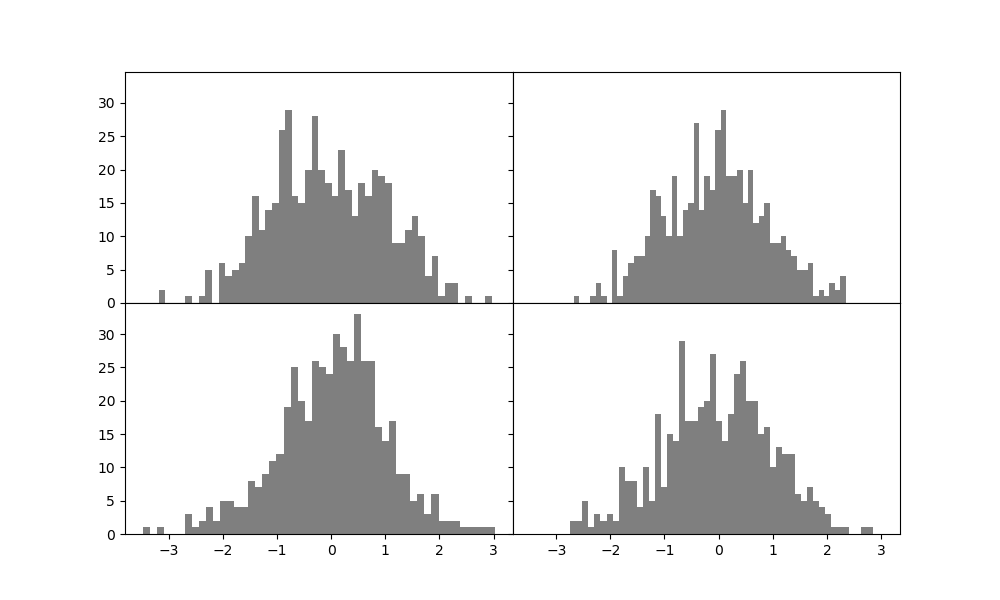

In [65]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

> You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels overlap, so in a case like this you would need to fix the labels yourself by speci‐ fying explicit tick locations and tick labels (we’ll look at how to do this in the follow‐ ing sections).



### Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute: 

    ax.plot(x, y, 'g--') 

This way of specifying both color and line style in a string is provided as a conve‐ nience; in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitly as:

    ax.plot(x, y, linestyle='--', color='g') 

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE'). You can see the full set of line styles by looking at the docstring for plot (use plot? in IPython or Jupyter).

(Page 259). 

In [68]:
from numpy.random import randn

<IPython.core.display.Javascript object>


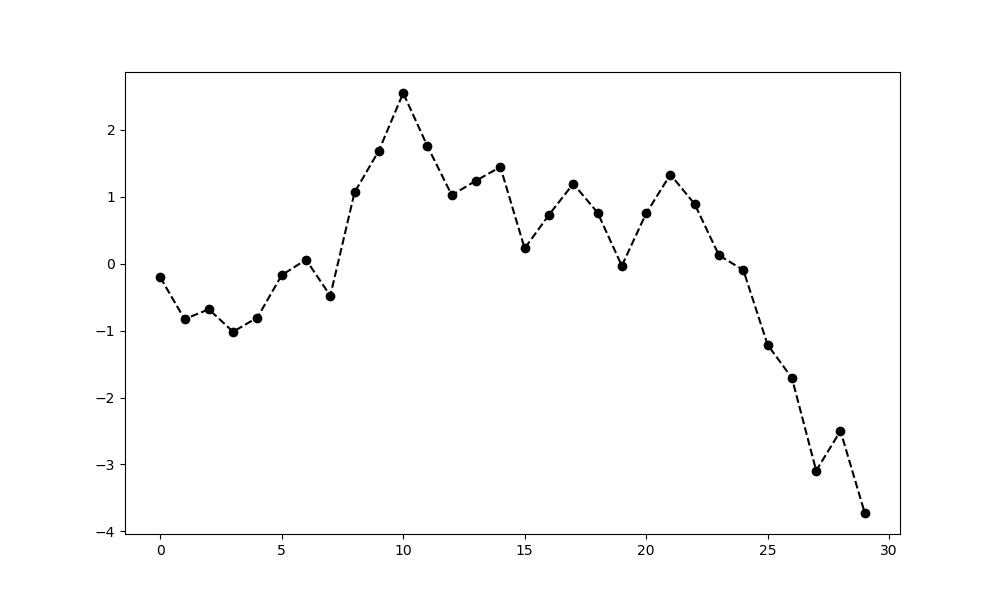

In [69]:
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

(Page 260). 

<IPython.core.display.Javascript object>


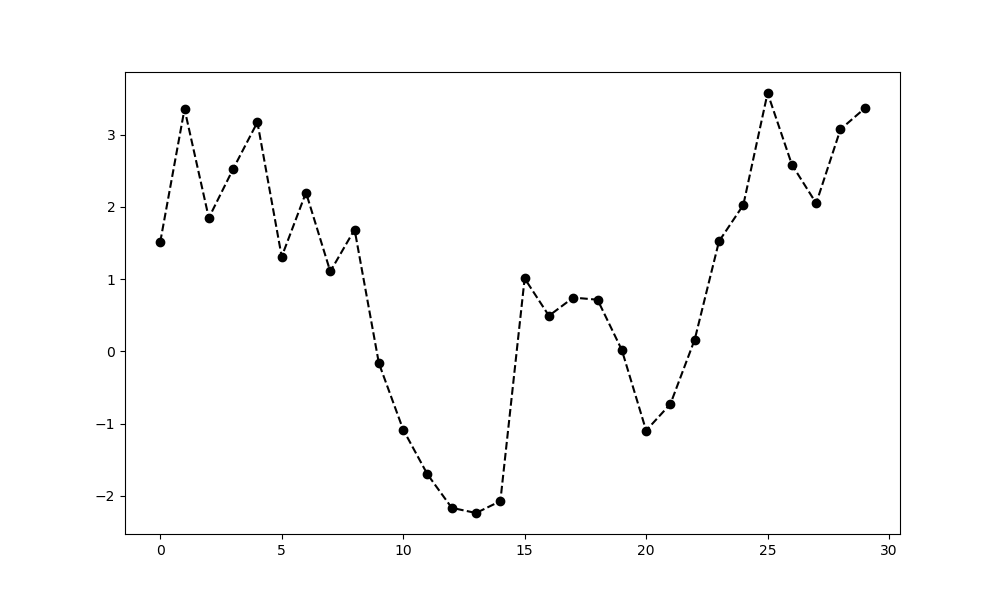

In [71]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [72]:
plt.close('all')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the drawstyle option (Figure 9-7):

(Page 260). 

<IPython.core.display.Javascript object>


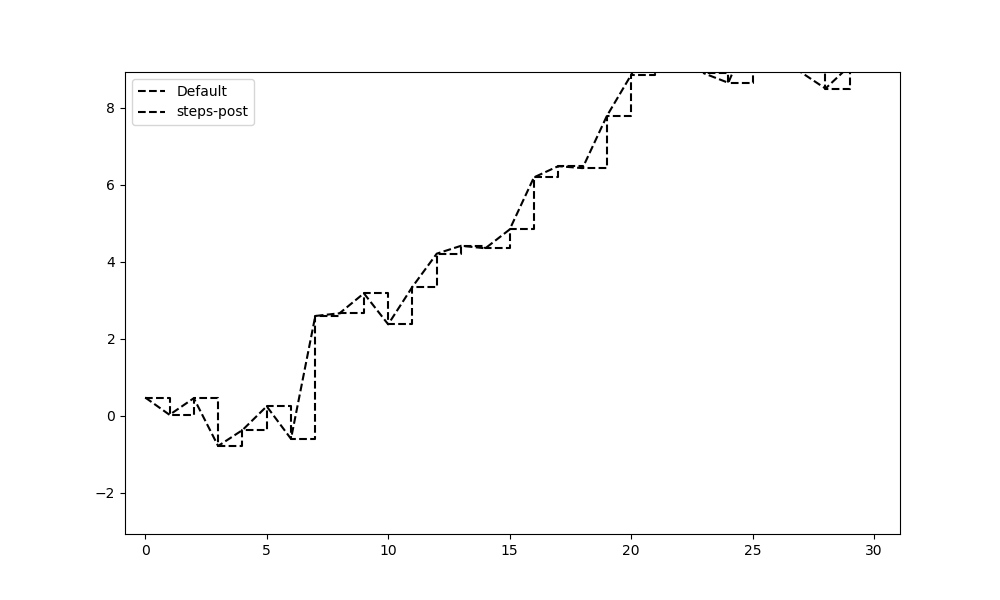

In [79]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented native matplotlib API. The pyplot interface, designed for interactive use, consists of methods like xlim, xticks, and xticklabels. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

 - Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range) 
 - Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are ax.get_xlim and ax.set_xlim. I prefer to use the subplot instance methods myself in the interest of being explicit (and especially when working with multiple subplots), but you can certainly use whichever you find more convenient.

(Page 262). 

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5,0,'Stages')

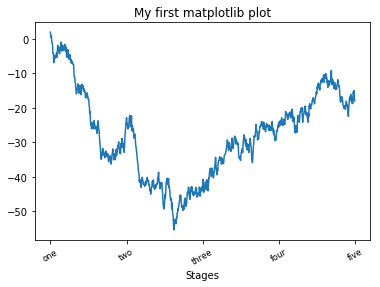

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks  = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

    props = {
        'title': 'My first matplotlib plot',
        'xlabel': 'Stages'
    }
    ax.set(**props)

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:

(Page 264). 

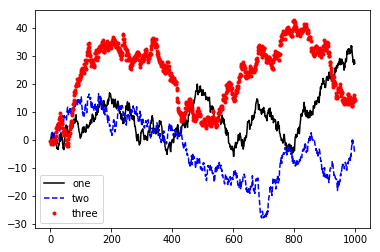

In [90]:
from numpy.random import randn
fig = plt.figure(); 
ax  = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k',   label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(randn(1000).cumsum(), 'r.',  label='three')
ax.legend(loc='best')

The legend method has several other choices for the location loc argument. See the docstring (with ax.legend?) for more information.

(Page 264). 

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annota‐ tions, which could consist of text, arrows, or other shapes. You can add annotations and text using the text, arrow, and annotate functions. text draws text at given coordinates (x, y) on the plot with optional custom styling:

    ax.text(x, y, 'Hello world!',
            family='monospace', fontsize=10)

Annotations can draw both text and arrows arranged appropriately. As an example, let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis. You can most easily reproduce this code example in a single cell in a Jupyter note‐ book. See Figure 9-11 for the result:

(Page 265). 

In [94]:
from datetime import datetime

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates = True)
spx  = data['SPX']

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

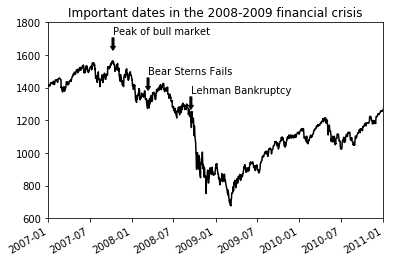

In [95]:
fig  = plt.figure()
ax   = fig.add_subplot(1,1,1)

spx.plot(ax = ax, style = 'k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12),  'Bear Sterns Fails'),
    (datetime(2008, 9, 15),  'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 75),
                   xytext = (date, spx.asof(date) + 225),
                arrowprops= dict(facecolor='black', headwidth=5, width=2,
                                headlength=4),
                horizontalalignment = 'left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

There are a couple of important points to highlight in this plot: the ax.annotate method can draw labels at the indicated x and y coordinates. We use the set_xlim and set_ylim methods to manually set the start and end boundaries for the plot rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the plot.

See the online matplotlib gallery for many more annotation examples to learn from. 

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like Rectangle and Circle, are found in matplotlib.pyplot, but the full set is located in matplotlib.patches. 

To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp) (see Figure 9-12):

(Page 266). 


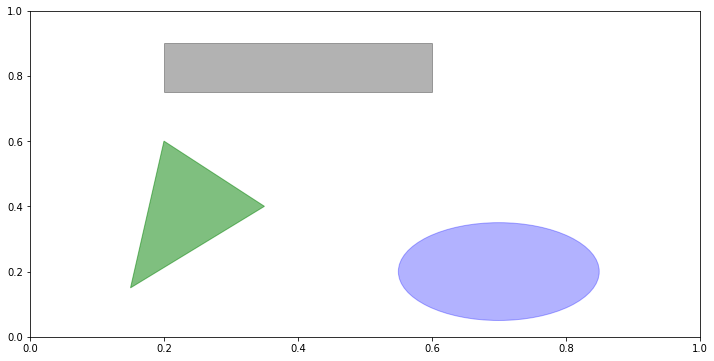

In [96]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

You can save the active figure to file using plt.savefig. This method is equivalent to the figure object’s savefig instance method. For example, to save an SVG version of a figure, you need only type:

    plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead, you would get a PDF. There are a couple of important options that I use frequently for publishing graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can trim the whitespace around the actual figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you would do:

    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO:

    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()

![T9-2](images/T9-2.png)

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primar‐ ily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration programmatically from Python is to use the rc method; for example, to set the global default figure size to be 10 × 10, you could enter:

    plt.rc('figure', figsize=(10, 10))

The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:

    font_options = {'family' : 'monospace',
                    'weight' : 'bold',
                    'size'   : 'small'}
    plt.rc('font', **font_options)

## Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base compo‐ nents: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), leg‐ end, title, tick labels, and other annotations.

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from Data‐ Frame and Series objects. Another library is seaborn, a statistical graphics library cre‐ ated by Michael Waskom. Seaborn simplifies creating many common visualization types.



> Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

(Page 269). 

### Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots (see Figure 9-13):

(Page 269). 

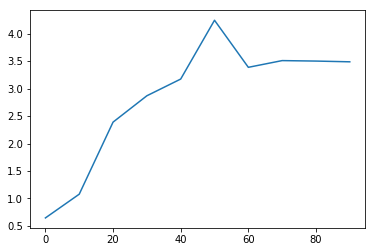

In [100]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

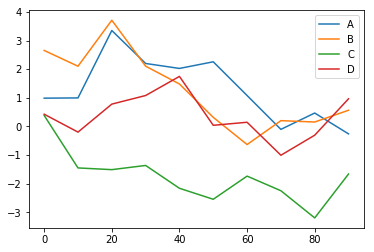

In [115]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

![T9-3](images/T9-3.png)

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots. See Table 9-4 for more on these.

(Page 271). 

![T9-3](images/T9-4.png)

### Bar Plots

The plot.bar() and plot.barh() make vertical and horizontal bar plots, respec‐ tively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks (see Figure 9-15):

(Page 272). 

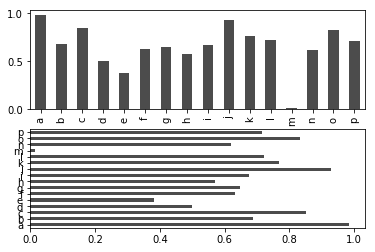

In [118]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar( ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

> The options color='k' and alpha=0.7 set the color of the plots to black and use par‐ tial transparency on the filling.



In [119]:
np.random.seed(12348)

In [120]:
df = pd.DataFrame(np.random.rand(6, 4), 
                  index   = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name='Gunus') 
                 )
df

Gunus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


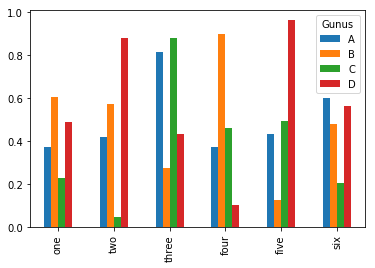

In [121]:
df.plot.bar()

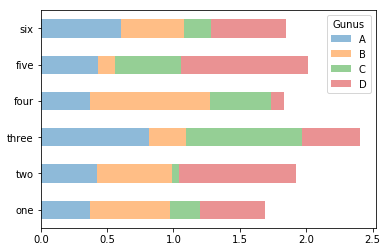

In [122]:
df.plot.barh(stacked=True, alpha=0.5)

In [123]:
plt.close('all')

Returning to the tipping dataset used earlier in the book, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a cross-tabulation by day and party size:

(Page 274). 

In [125]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Returning to the tipping dataset used earlier in the book, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a cross-tabulation by day and party size:

(Page 274). 

In [126]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [138]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then, normalize so that each row sums to 1 and make the plot (see Figure 9-18):

(Page 275). 

In [146]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [144]:
party_counts.div(party_counts.sum(1), axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


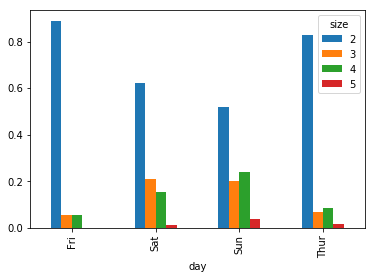

In [139]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

> So you can see that party sizes appear to increase on the weekend in this dataset.



In [147]:
plt.close('all')

In [148]:
import seaborn as sns

In [156]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,day,size,total_bill,tip,smoker,time,tip_pct
0,Sun,2,16.99,1.01,No,Dinner,0.063204
1,Sun,3,10.34,1.66,No,Dinner,0.191244
2,Sun,3,21.01,3.50,No,Dinner,0.199886
3,Sun,2,23.68,3.31,No,Dinner,0.162494
4,Sun,4,24.59,3.61,No,Dinner,0.172069


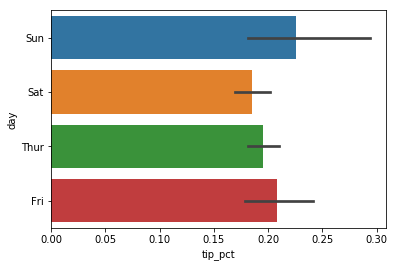

In [157]:
sns.barplot(x = 'tip_pct', y = 'day', data=tips, orient='h')

In [158]:
plt.close('all')

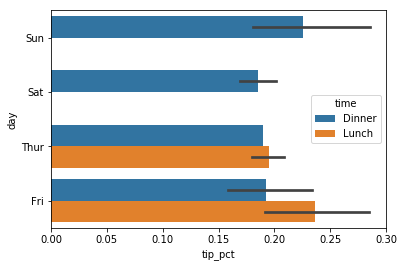

In [159]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [160]:
plt.close('all')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using seaborn.set:

(Page 277). 

In [161]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [ ]:
plt.figure()

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. Using the tipping data from before, we can make a histo‐ gram of tip percentages of the total bill using the plot.hist method on the Series (see Figure 9-21):

(Page 277). 

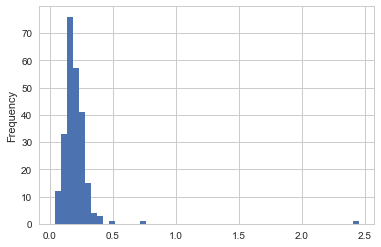

In [163]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

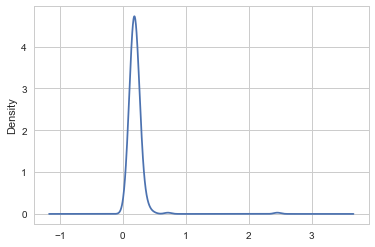

In [164]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

Seaborn makes histograms and density plots even easier through its distplot method, which can plot both a histogram and a continuous density estimate simulta‐ neously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions (see Figure 9-23):

(Page 279). 

In [165]:
comp1  = np.random.normal(0,  1, size=200)
comp2  = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values

0       0.203887
1      -2.213737
2       0.315042
3      -0.137200
4       0.036238
5       0.757814
6       1.544269
7      -1.728043
8       0.793393
9      -0.347674
         ...    
390    10.582080
391    11.975785
392    13.370519
393     8.174433
394     9.554141
395    10.636197
396     9.259458
397    10.182617
398    10.686063
399    10.864287
Length: 400, dtype: float64

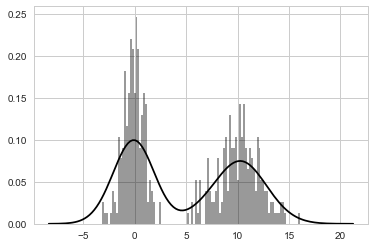

In [166]:
sns.distplot(values, bins=100, color='k')

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. For example, here we load the macrodata dataset from the statsmodels project, select a few variables, then compute log differences:

(Page 280). 

In [169]:
macro = pd.read_csv('examples/macrodata.csv')
data  = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [170]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [171]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
plt.figure()

We can then use seaborn’s regplot method, which makes a scatter plot and fits a lin‐ ear regression line (see Figure 9-24):

(Page 281). 

Text(0.5,1,'Changes in log m1 versus log unemp')

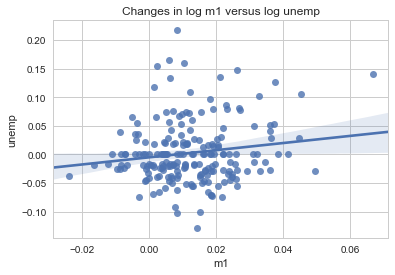

In [173]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

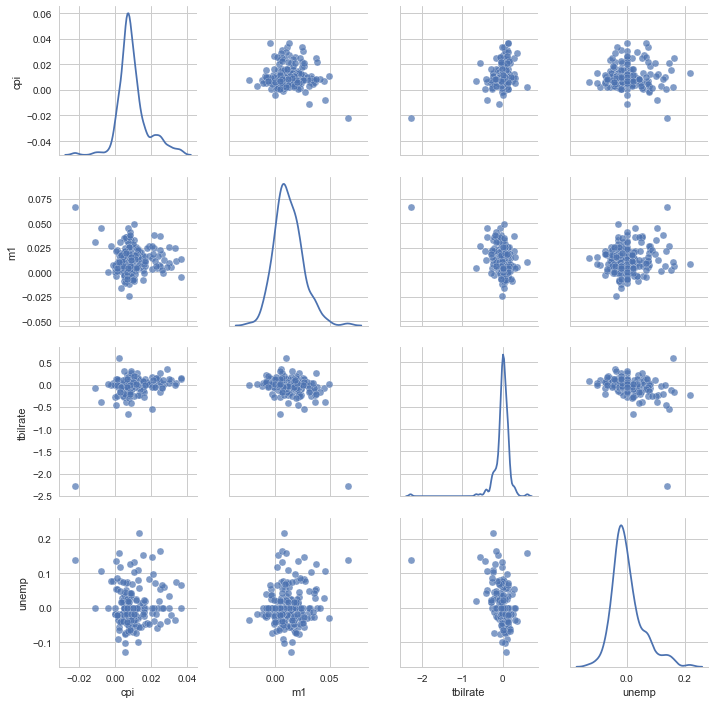

In [175]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha' : 0.7})

> You may notice the plot_kws argument. This enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements. Check out the seaborn.pairplot docstring for more granular configuration options.



### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to vis‐ ualize data with many categorical variables is to use a facet grid. Seaborn has a useful built-in function factorplot that simplifies making many kinds of faceted plots (see Figure 9-26 for the resulting plot):

(Page 283). 

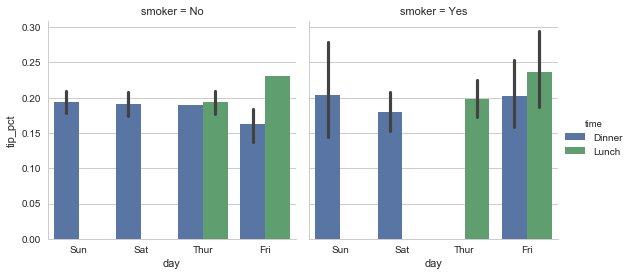

In [179]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', 
               kind='bar', data=tips[tips.tip_pct<1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value (Figure 9-27):

(Page 283). 

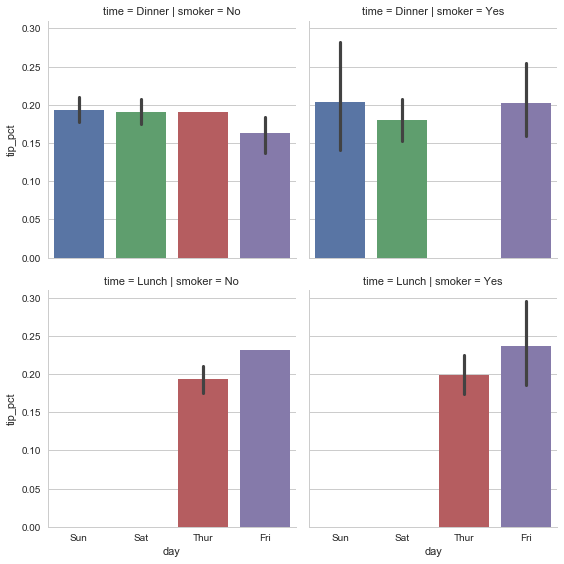

In [181]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar',
               data=tips[tips.tip_pct < 1])


factorplot supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and out‐ liers) can be an effective visualization type (Figure 9-28):

(Page 284). 

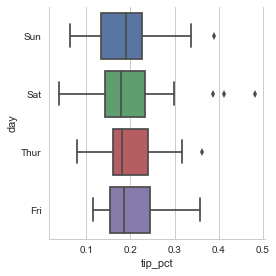

In [180]:
sns.factorplot(x='tip_pct', y='day', kind='box', 
            `   data=tips[tips.tip_pct<0.5])

## Other Python Visualization Tools

In [182]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion